# Top XI for Ruben Amorim's Team

This notebook performs detailed position-specific analysis of football players using the functions from the provided files:
- `position_analysis.py`
- `position_specific_analysis.py`

The notebook will generate football player analysis visualizations directly from the Excel file data:
1. 3D TSNE player similarity maps
2. Top players by position rankings
3. Player comparison radar charts
4. Versatility analysis
5. Statistical leaderboards

In [36]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

from position_analysis import (
    prepare_dataframe,
    infer_position_weights
)

from position_specific_analysis import (
    create_3d_tsne_plot,
    create_top_players_by_position,
    create_player_radar_chart,
    find_specific_versatile_players,
    create_versatility_visualization,
    create_enhanced_stat_leaderboards,
    create_enhanced_per90_stat_leaderboards
)

## Load Data from Excel File

We'll load the player data directly from an Excel file using the `generate_position_visualizations` function from `position_analysis.py`. This function:

1. Loads data from an Excel file with two sheets:
   - 'Current Season' - Current season player data
   - 'Multi-Season Weighted' - Multi-season weighted data

2. Prepares the dataframes for analysis

3. Infers position weights dynamically based on available columns

In [37]:
# Set the file path to your Excel file
file_path = './save_data/player_analysis_data.xlsx'  # Update this with your file path

# Read current season sheet
df_current = pd.read_excel(file_path, sheet_name='Current Season')
print(f"Current Season data loaded: {len(df_current)} rows, {len(df_current.columns)} columns")

# Read multi-season weighted sheet
df_weighted = pd.read_excel(file_path, sheet_name='Multi-Season Weighted')
print(f"Multi-Season Weighted data loaded: {len(df_weighted)} rows, {len(df_weighted.columns)} columns")

# Prepare dataframes
df_current = prepare_dataframe(df_current)
df_weighted = prepare_dataframe(df_weighted)

# Infer position weights dynamically
position_weights = infer_position_weights(df_current)
print("Inferred Position Weights:", list(position_weights.keys()))

# Define positions and position groups
positions = ['LCB', 'CB', 'RCB', 'LWB', 'RWB', 'LCM', 'RCM', 'CAM', 'LW', 'RW', 'ST']
position_groups = {
    'Defense': ['LCB', 'CB', 'RCB', 'LWB', 'RWB'],
    'Midfield': ['LCM', 'RCM', 'CAM'],
    'Forward': ['LW', 'RW', 'ST']
}

print("Data loaded and prepared successfully!")

Current Season data loaded: 2540 rows, 83 columns
Multi-Season Weighted data loaded: 2540 rows, 26 columns
Inferred Position Weights: ['CB', 'LCB', 'RCB', 'LWB', 'RWB', 'CM', 'CDM', 'CAM', 'LW', 'RW', 'ST']
Data loaded and prepared successfully!


## 3D TSNE Player Similarity Map

The t-SNE (t-Distributed Stochastic Neighbor Embedding) visualization shows player similarity in a 3D space based on their statistical profiles. Players with similar playing styles will be clustered together, even if they play different nominal positions.

This visualization helps:
- Identify players with similar statistical profiles
- Discover players who could potentially play in different positions
- Analyze clusters of playing styles within the squad

In [38]:
# Create 3D t-SNE visualization
tsne_fig = create_3d_tsne_plot(df_current, df_weighted)

# Display the figure
tsne_fig.show()

## Top Players by Position

The following visualizations show the top 10 players for each position based on their position-specific weighted scores.


In [39]:
print("Generating top players visualizations for CB, LCB, RCB, LWB & RWB")

top_cb_fig = create_top_players_by_position(df_current, df_weighted, 'CB', top_n=10)
print("CB visualization generated")
top_cb_fig.show()

top_lcb_fig = create_top_players_by_position(df_current, df_weighted, 'LCB', top_n=10)
print("LCB visualization generated")
top_lcb_fig.show()

top_rcb_fig = create_top_players_by_position(df_current, df_weighted, 'RCB', top_n=10)
print("RCB visualization generated")
top_rcb_fig.show()

top_lcb_fig = create_top_players_by_position(df_current, df_weighted, 'LWB', top_n=10)
print("LWB visualization generated")
top_lcb_fig.show()

top_rcb_fig = create_top_players_by_position(df_current, df_weighted, 'RWB', top_n=10)
print("RWB visualization generated")
top_rcb_fig.show()

# Generate all positions (without displaying)
position_top_figs = {}
for position in positions:
    position_top_figs[position] = create_top_players_by_position(
        df_current, df_weighted, position, top_n=10
    )

print(f"All {len(position_top_figs)} position visualizations generated successfully!")

Generating top players visualizations for CB, LCB, RCB, LWB & RWB
CB visualization generated


LCB visualization generated


RCB visualization generated


LWB visualization generated


RWB visualization generated


All 11 position visualizations generated successfully!


In [40]:
print("Generating top players visualizations LCM, RCM & CAM")

top_lcm_fig = create_top_players_by_position(df_current, df_weighted, 'LCM', top_n=10)
print("LCM visualization generated")
top_lcm_fig.show()

top_rcm_fig = create_top_players_by_position(df_current, df_weighted, 'RCM', top_n=10)
print("RCM visualization generated")
top_rcm_fig.show()

top_cam_fig = create_top_players_by_position(df_current, df_weighted, 'CAM', top_n=10)
print("CAM visualization generated")
top_cam_fig.show()

# Generate all positions (without displaying)
position_top_figs = {}
for position in positions:
    position_top_figs[position] = create_top_players_by_position(
        df_current, df_weighted, position, top_n=10
    )

print(f"All {len(position_top_figs)} position visualizations generated successfully!")

Generating top players visualizations LCM, RCM & CAM
LCM visualization generated


RCM visualization generated


CAM visualization generated


All 11 position visualizations generated successfully!


Generating top players visualizations ST, LW & RW
ST visualization generated


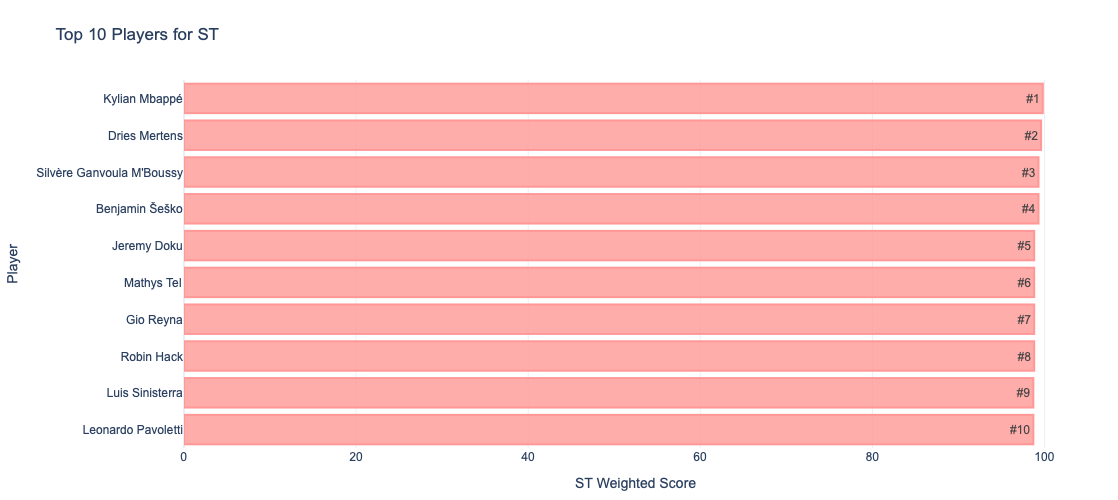

LW visualization generated


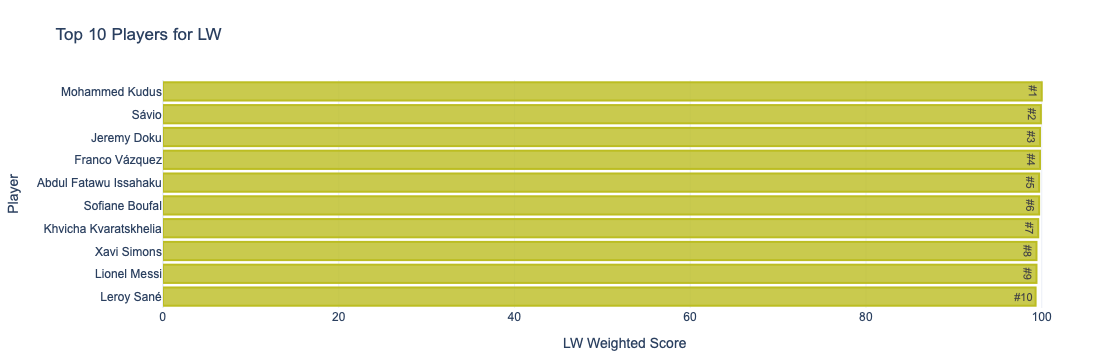

RW visualization generated


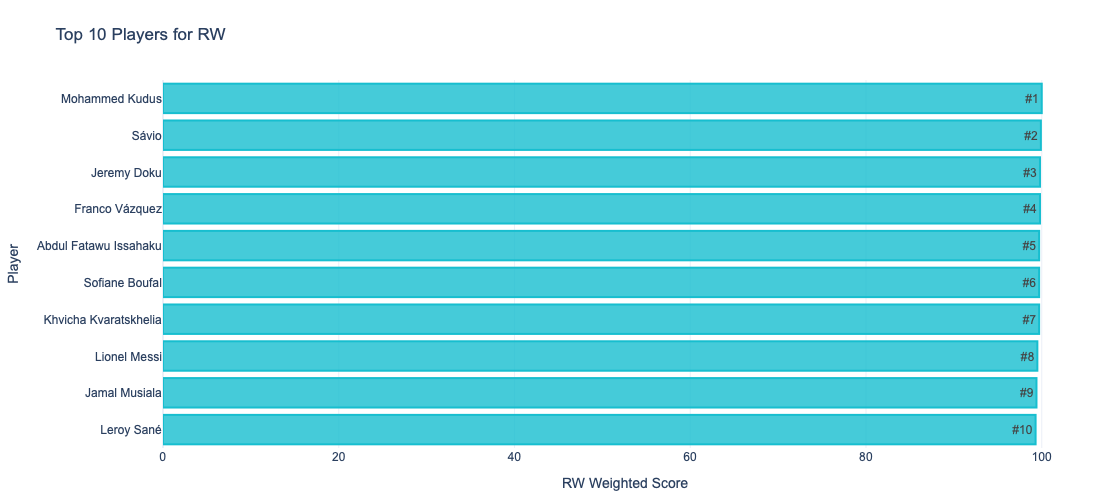

All 11 position visualizations generated successfully!


In [28]:
# Create top players visualizations for key positions
print("Generating top players visualizations ST, LW & RW")

top_st_fig = create_top_players_by_position(df_current, df_weighted, 'ST', top_n=10)
print("ST visualization generated")
top_st_fig.show()

top_lw_fig = create_top_players_by_position(df_current, df_weighted, 'LW', top_n=10)
print("LW visualization generated")
top_lw_fig.show()

top_rw_fig = create_top_players_by_position(df_current, df_weighted, 'RW', top_n=10)
print("RW visualization generated")
top_rw_fig.show()

# Generate all positions (without displaying)
position_top_figs = {}
for position in positions:
    position_top_figs[position] = create_top_players_by_position(
        df_current, df_weighted, position, top_n=10
    )

print(f"All {len(position_top_figs)} position visualizations generated successfully!")

## Player Radar Charts

Radar charts provide a visual comparison of the top players for each position based on the key statistics for that position. Each player is represented by a polygon on the radar, with each vertex representing their performance in a specific statistical category.

These visualizations help:
- Compare multiple players across several statistical dimensions simultaneously
- Identify strengths and weaknesses of top players at each position
- Find complementary player profiles within position groups

Generating radar chart for Defenders
RWB radar chart generated


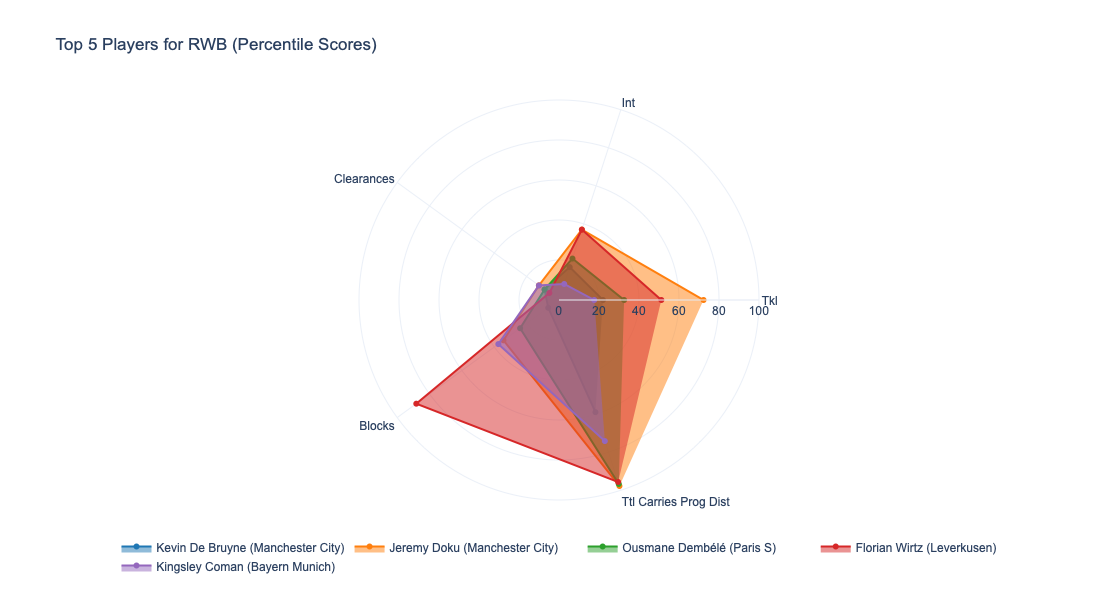

LCB radar chart generated


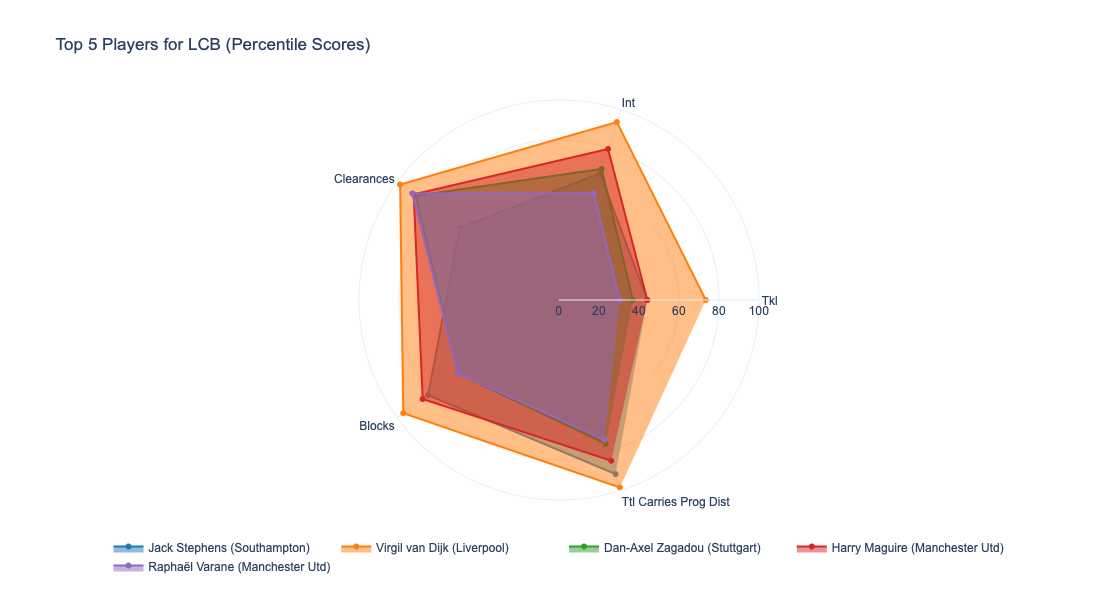

CB radar chart generated


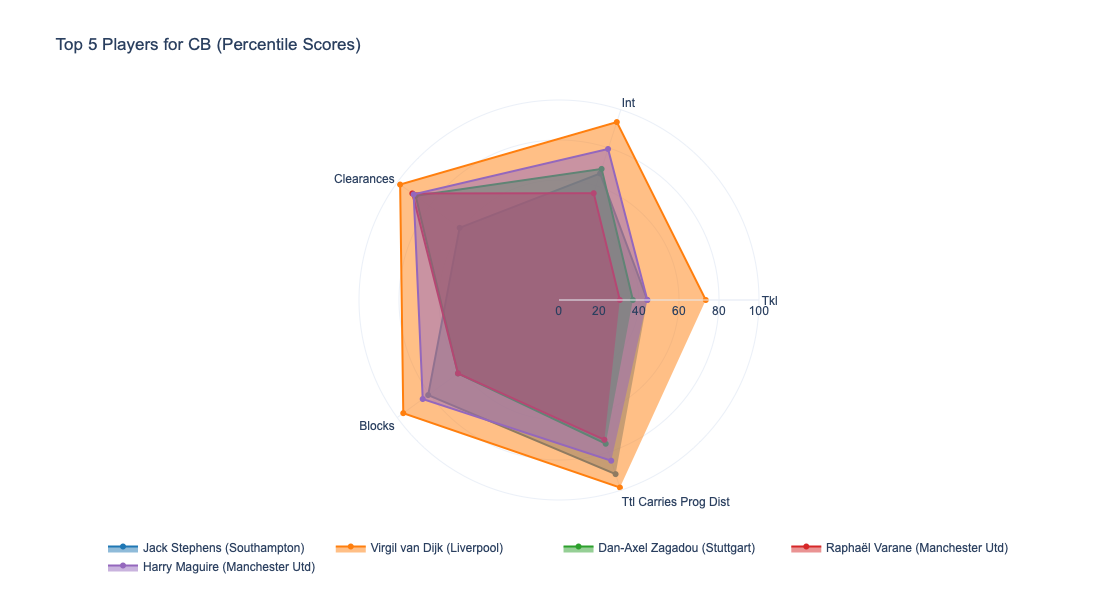

RCB radar chart generated


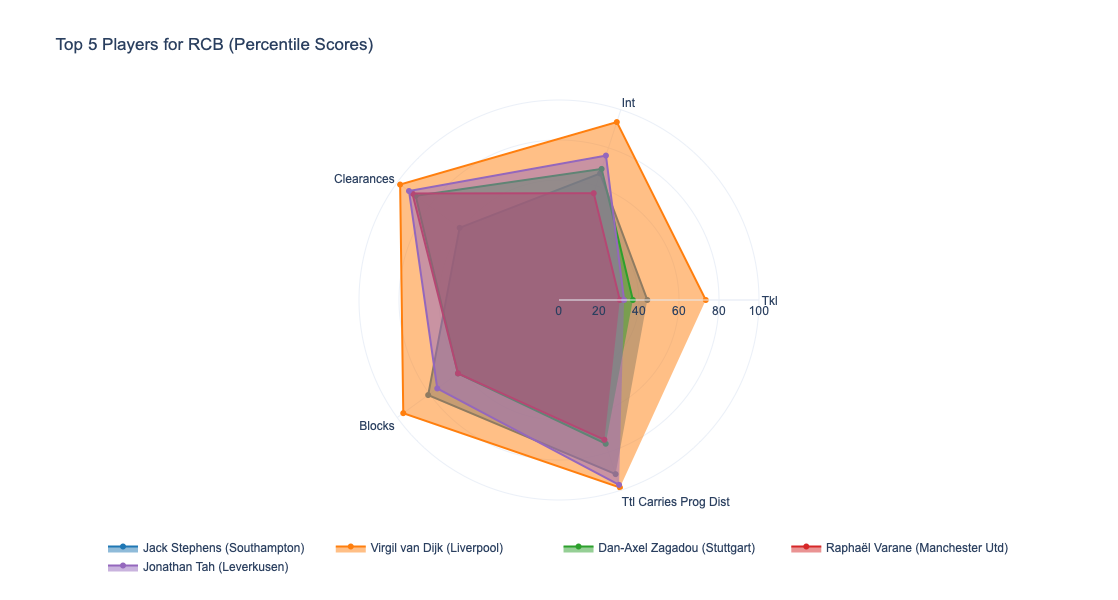

RWB radar chart generated


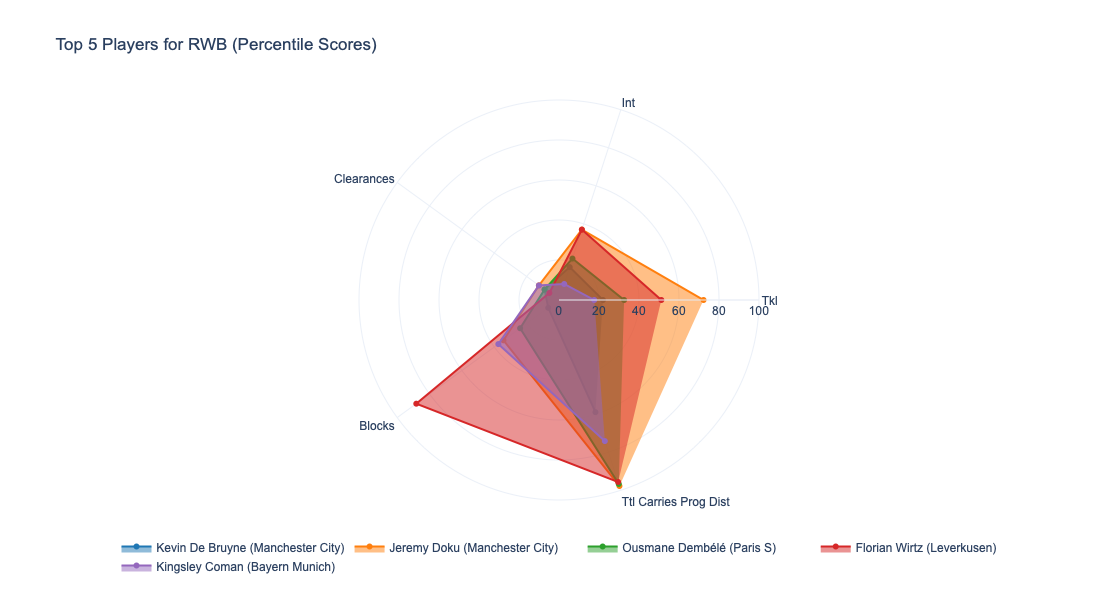

All 11 radar chart visualizations generated successfully!


In [41]:
print("Generating radar chart for Defenders")

radar_rwb_fig = create_player_radar_chart(df_current, df_weighted, 'RWB', top_n=5)
print("RWB radar chart generated")
radar_rwb_fig.show()

radar_lcb_fig = create_player_radar_chart(df_current, df_weighted, 'LCB', top_n=5)
print("LCB radar chart generated")
radar_lcb_fig.show()

radar_cb_fig = create_player_radar_chart(df_current, df_weighted, 'CB', top_n=5)
print("CB radar chart generated")
radar_cb_fig.show()

radar_rcb_fig = create_player_radar_chart(df_current, df_weighted, 'RCB', top_n=5)
print("RCB radar chart generated")
radar_rcb_fig.show()

radar_rwb_fig = create_player_radar_chart(df_current, df_weighted, 'RWB', top_n=5)
print("RWB radar chart generated")
radar_rwb_fig.show()

position_radar_figs = {}
for position in positions:
    position_radar_figs[position] = create_player_radar_chart(
        df_current, df_weighted, position, top_n=5
    )

print(f"All {len(position_radar_figs)} radar chart visualizations generated successfully!")

Generating radar chart for Midfielders
LCM radar chart generated


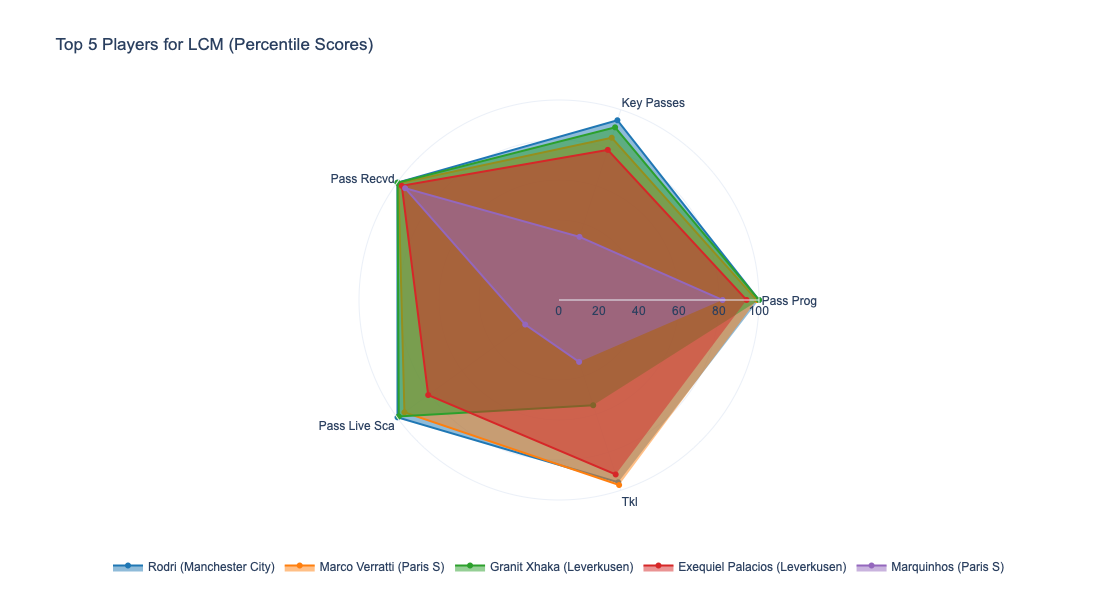

CAM radar chart generated


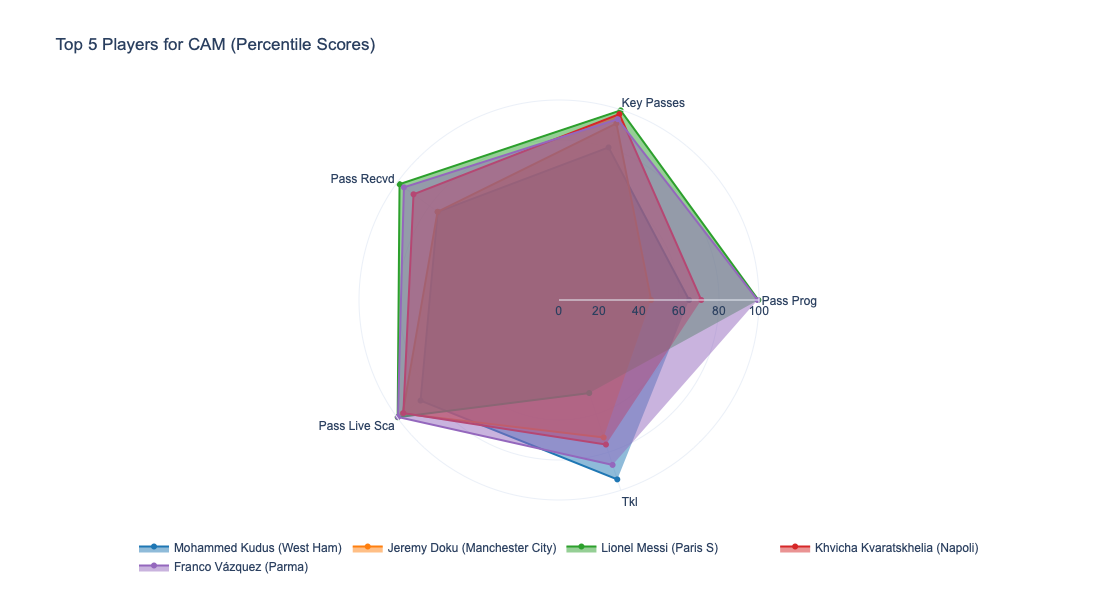

RCM radar chart generated


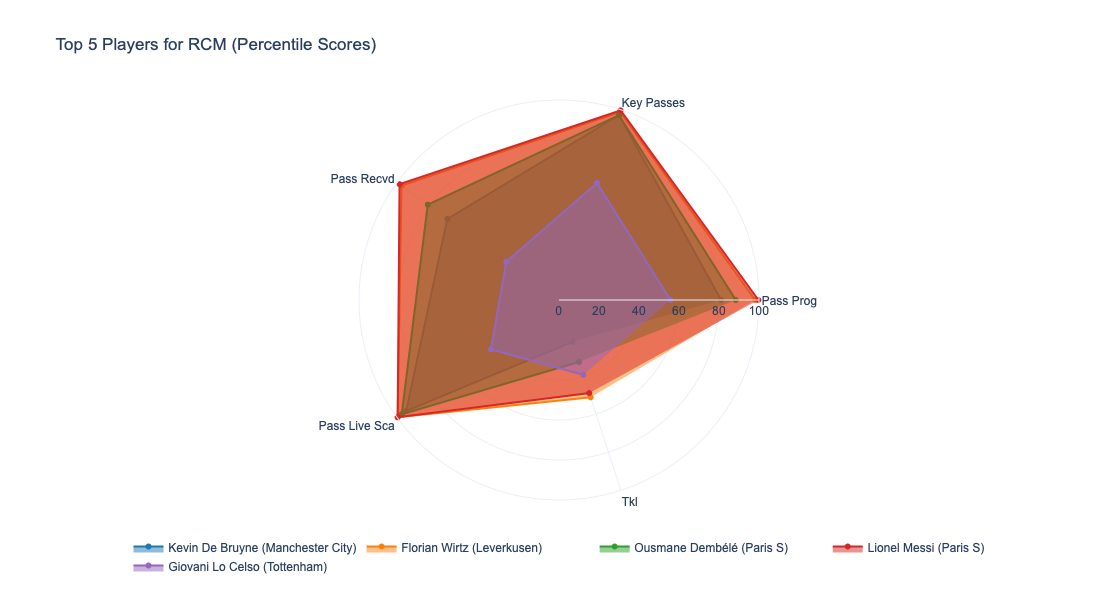

All 11 radar chart visualizations generated successfully!


In [42]:
print("Generating radar chart for Midfielders")

radar_rwb_fig = create_player_radar_chart(df_current, df_weighted, 'LCM', top_n=5)
print("LCM radar chart generated")
radar_rwb_fig.show()

radar_lcb_fig = create_player_radar_chart(df_current, df_weighted, 'CAM', top_n=5)
print("CAM radar chart generated")
radar_lcb_fig.show()

radar_cb_fig = create_player_radar_chart(df_current, df_weighted, 'RCM', top_n=5)
print("RCM radar chart generated")
radar_cb_fig.show()

position_radar_figs = {}
for position in positions:
    position_radar_figs[position] = create_player_radar_chart(
        df_current, df_weighted, position, top_n=5
    )

print(f"All {len(position_radar_figs)} radar chart visualizations generated successfully!")

Generating radar chart for Forwards
LW radar chart generated


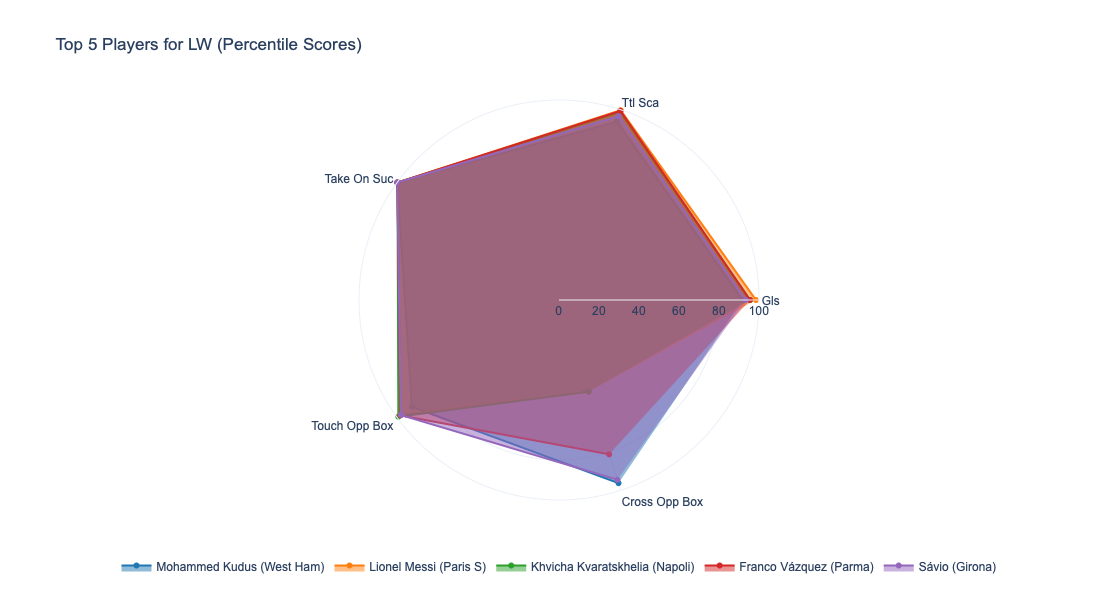

ST radar chart generated


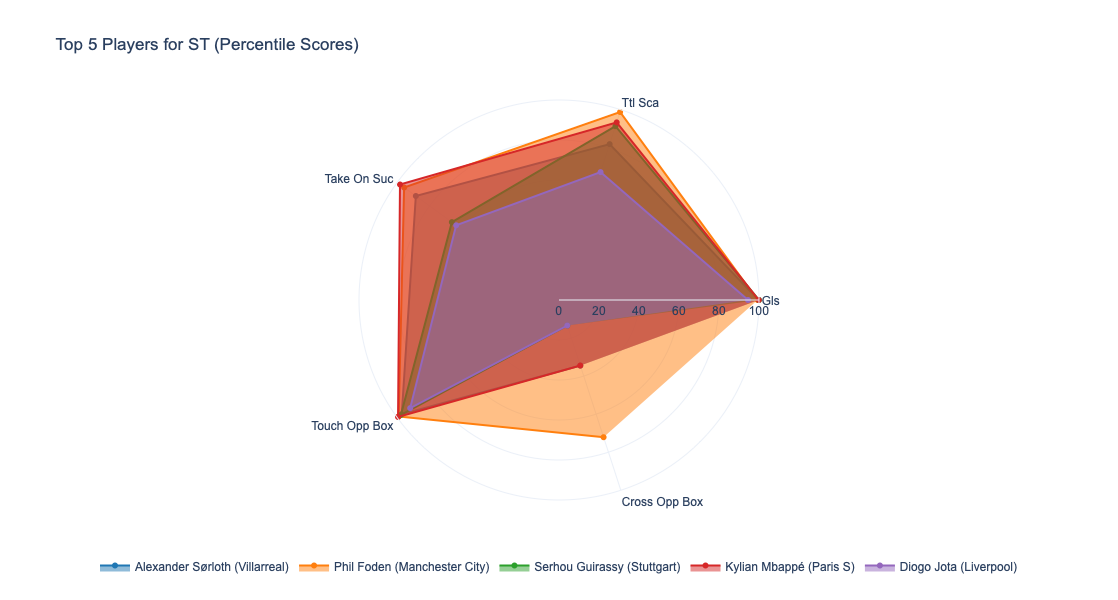

RW radar chart generated


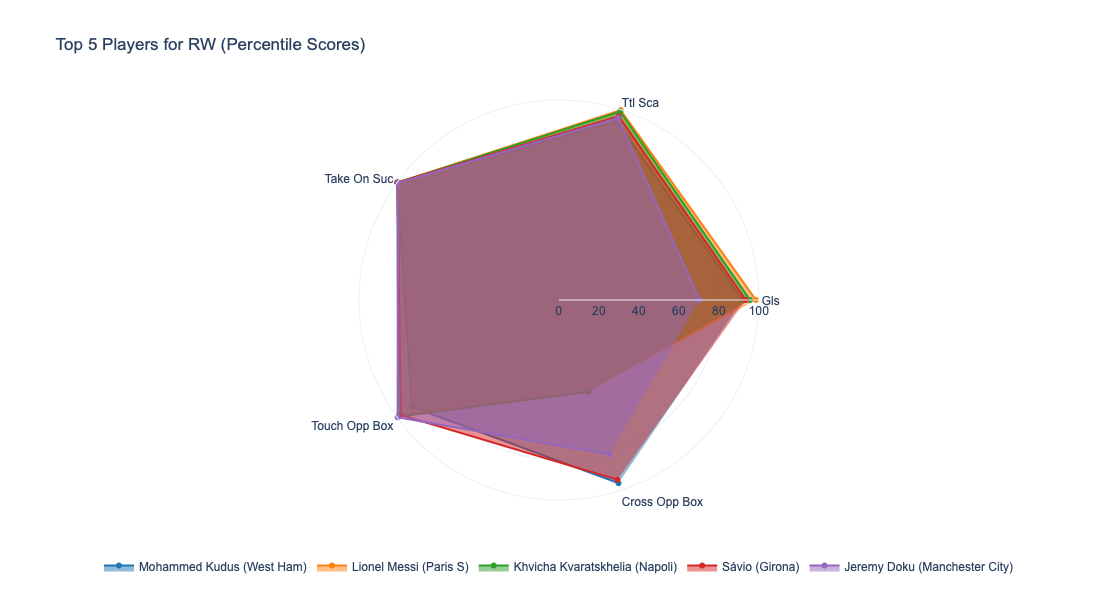

All 11 radar chart visualizations generated successfully!


In [35]:
print("Generating radar chart for Forwards")

radar_rwb_fig = create_player_radar_chart(df_current, df_weighted, 'LW', top_n=5)
print("LW radar chart generated")
radar_rwb_fig.show()

radar_lcb_fig = create_player_radar_chart(df_current, df_weighted, 'ST', top_n=5)
print("ST radar chart generated")
radar_lcb_fig.show()

radar_cb_fig = create_player_radar_chart(df_current, df_weighted, 'RW', top_n=5)
print("RW radar chart generated")
radar_cb_fig.show()

# Generate all radar charts (without displaying)
position_radar_figs = {}
for position in positions:
    position_radar_figs[position] = create_player_radar_chart(
        df_current, df_weighted, position, top_n=5
    )

print(f"All {len(position_radar_figs)} radar chart visualizations generated successfully!")

## Versatility Analysis

This analysis identifies players who can effectively play in multiple positions. Versatile players are valuable for:
- Squad rotation and depth
- Tactical flexibility during matches
- Covering injuries or suspensions
- Transitions between different formations

The visualization shows the top 20 most versatile players, ranked by the number of positions they can play effectively and their positional diversity scores.

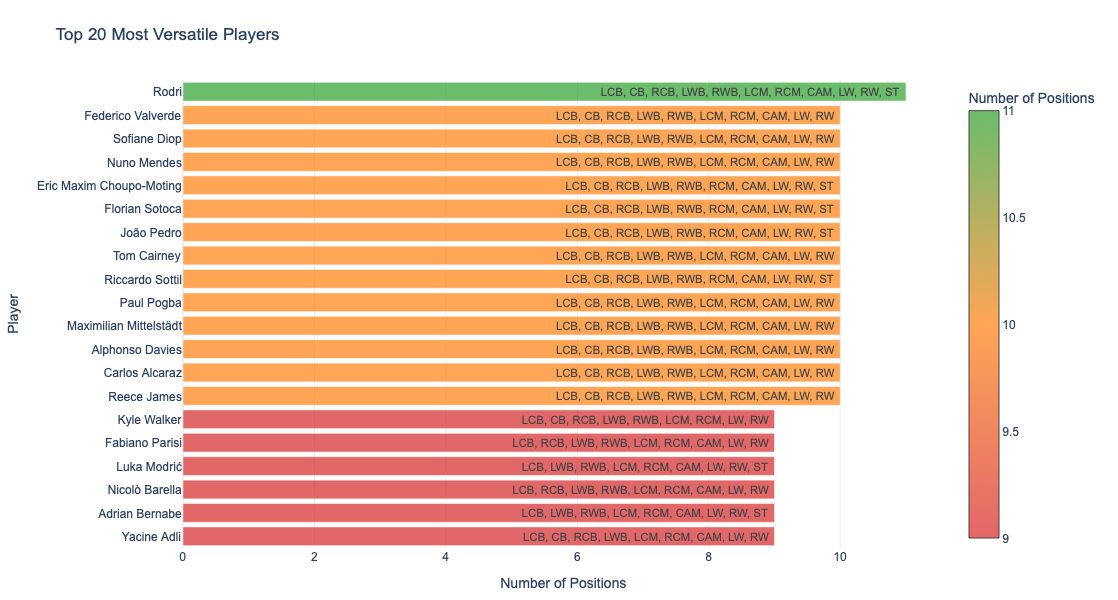

Top 10 most versatile players:


,player_name,team,main_position,age,versatility_count,versatile_positions,position_scores
216,Rodri,Manchester City,LCM,27,11,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW, ST","{'LCB': 99.4, 'CB': 92.0, 'RCB': 97.8, 'LWB': ..."
1483,Federico Valverde,Real Madrid,LCB,25,10,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW","{'LCB': 95.7, 'CB': 87.8, 'RCB': 93.5, 'LWB': ..."
796,Sofiane Diop,Nice,LWB,22,10,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW","{'LCB': 85.7, 'CB': 76.3, 'RCB': 71.6, 'LWB': ..."
823,Nuno Mendes,Paris S,LWB,20,10,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW","{'LCB': 84.5, 'CB': 77.8, 'RCB': 85.9, 'LWB': ..."
401,Eric Maxim Choupo-Moting,Bayern Munich,ST,34,10,"LCB, CB, RCB, LWB, RWB, RCM, CAM, LW, RW, ST","{'LCB': 70.9, 'CB': 80.1, 'RCB': 78.1, 'LWB': ..."
653,Florian Sotoca,Lens,RCM,32,10,"LCB, CB, RCB, LWB, RWB, RCM, CAM, LW, RW, ST","{'LCB': 93.7, 'CB': 91.6, 'RCB': 73.5, 'LWB': ..."
78,João Pedro,Brighton,CAM,21,10,"LCB, CB, RCB, LWB, RWB, RCM, CAM, LW, RW, ST","{'LCB': 84.9, 'CB': 84.9, 'RCB': 77.7, 'LWB': ..."
148,Tom Cairney,Fulham,RCM,32,10,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW","{'LCB': 96.2, 'CB': 88.5, 'RCB': 92.3, 'LWB': ..."
1012,Riccardo Sottil,Fiorentina,LWB,24,10,"LCB, CB, RCB, LWB, RWB, RCM, CAM, LW, RW, ST","{'LCB': 85.7, 'CB': 86.8, 'RCB': 76.4, 'LWB': ..."
255,Paul Pogba,Manchester Utd,LCB,28,10,"LCB, CB, RCB, LWB, RWB, LCM, RCM, CAM, LW, RW","{'LCB': 93.4, 'CB': 82.5, 'RCB': 82.3, 'LWB': ..."


In [43]:
# Find versatile players
versatility_df = find_specific_versatile_players(df_current, df_weighted)

# Create versatility visualization
versatility_fig = create_versatility_visualization(df_current, df_weighted, top_n=20)
versatility_fig.show()

# Display the versatility data if available
if not isinstance(versatility_df, pd.DataFrame) or versatility_df.empty:
    print("No versatile players found in the dataset.")
else:
    print("Top 10 most versatile players:")
    display(versatility_df.head(10))

## Statistical Leaderboards

### Raw Statistical Leaderboards

The following visualization shows the top performers in key statistical categories:
- Goals
- Assists
- Goals + Assists
- Shot-Creating Actions
- Progressive Passes
- Key Passes
- Successful Take-Ons

These leaderboards help identify the most productive players regardless of position.

Generating statistical leaderboards...


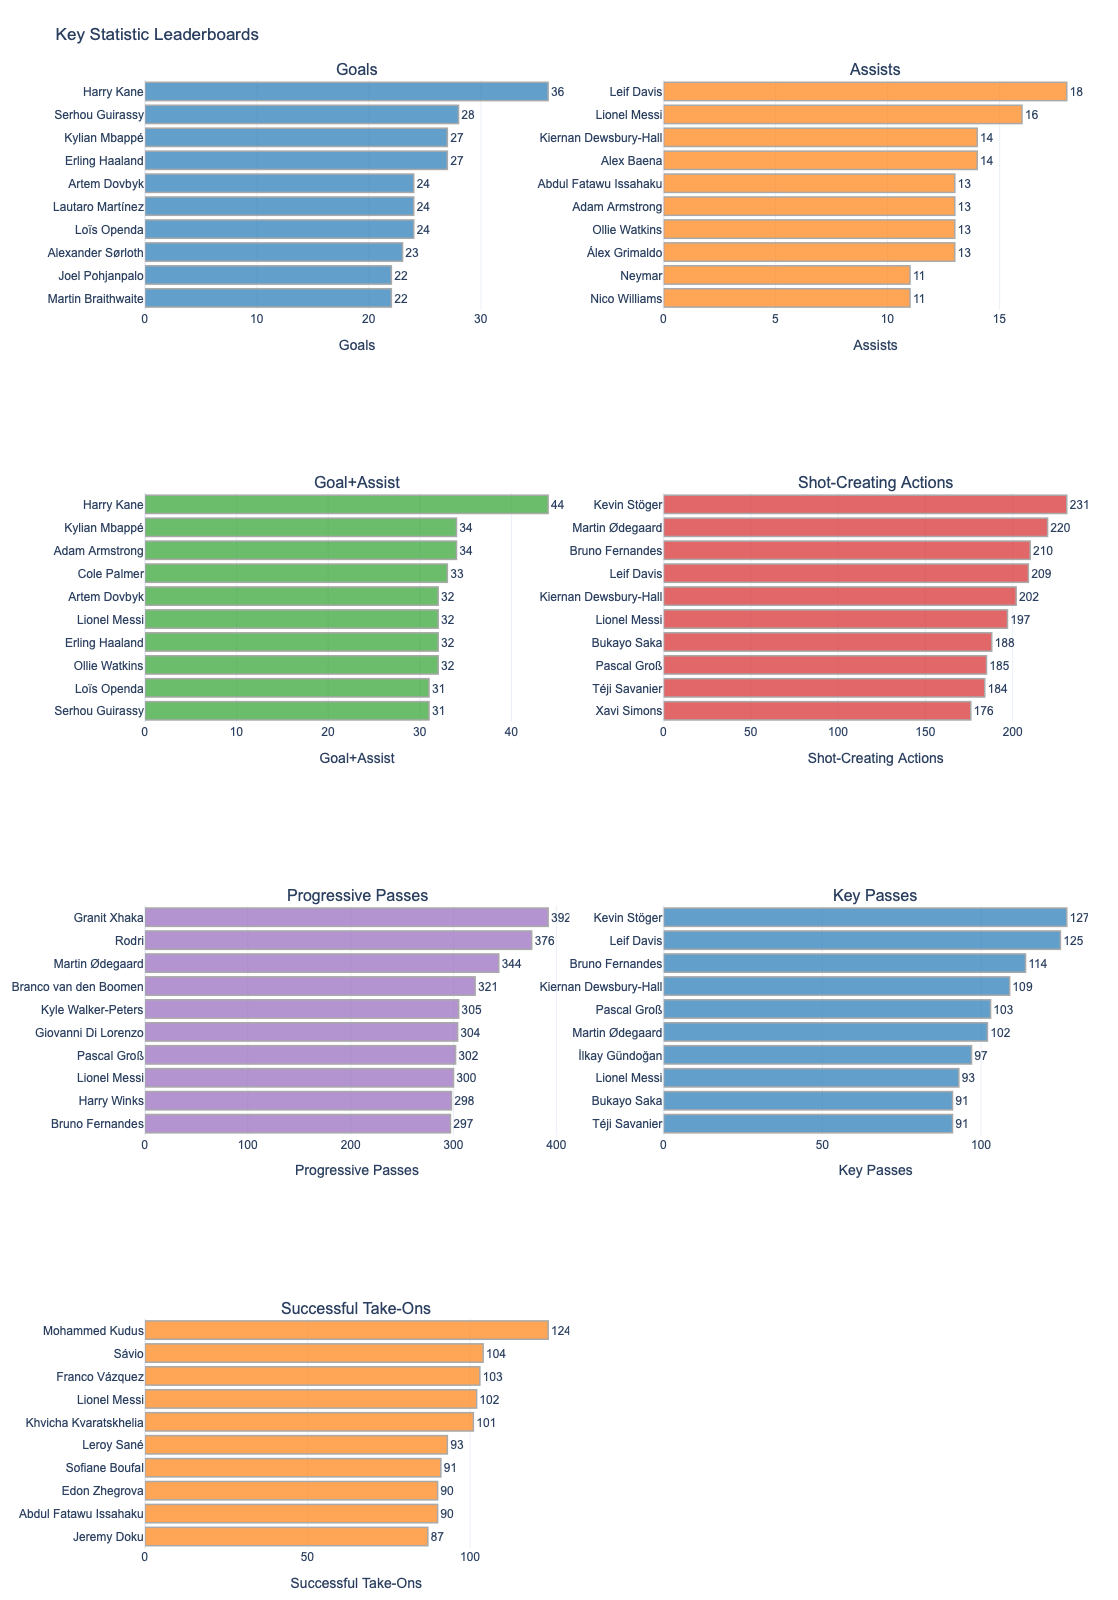

In [44]:
# Create enhanced statistical leaderboards
print("Generating statistical leaderboards...")

stats_leaderboard_fig = create_enhanced_stat_leaderboards(df_current, df_weighted, top_n=10)
stats_leaderboard_fig.show()

## Per 90 Minutes Statistical Leaderboards

These leaderboards normalize performance by minutes played, showing the most efficient players on a per-90-minute basis:
- Goals per 90
- Assists per 90
- G+A per 90
- Shot-Creating Actions per 90
- Progressive Passes per 90
- Key Passes per 90
- Tackles + Interceptions per 90
- Successful Take-Ons per 90

Per 90 stats help identify effective players who may have played fewer minutes.

Generating per 90 minutes statistical leaderboards...


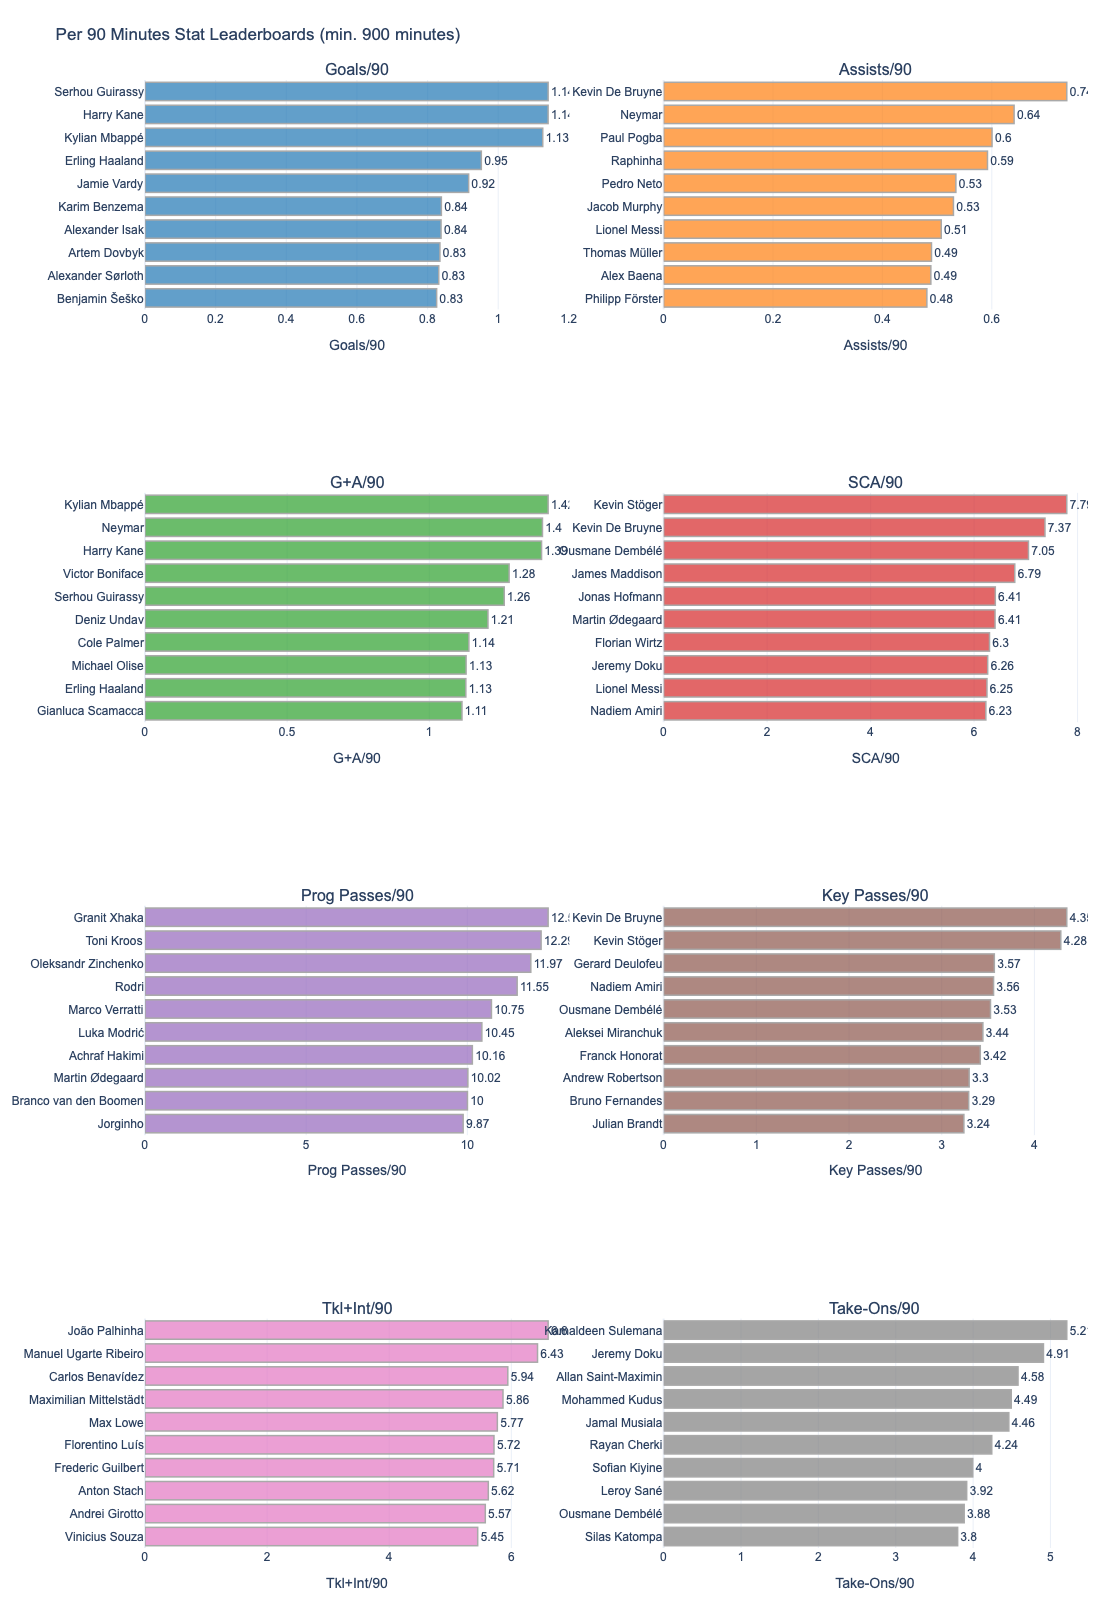

In [45]:
# Create enhanced per 90 minutes statistical leaderboards
print("Generating per 90 minutes statistical leaderboards...")

per90_stats_leaderboard_fig = create_enhanced_per90_stat_leaderboards(
    df_current, df_weighted, top_n=10, min_minutes=900
)
per90_stats_leaderboard_fig.show()

## Summary and Conclusion

1. **3D TSNE Player Similarity Map**: Showed player clustering based on statistical profiles
2. **Top Players by Position**: Identified the best players for each position based on weighted scores
3. **Player Radar Charts**: Compared top players across key statistical categories for each position
4. **Versatility Analysis**: Highlighted the most versatile players who can play multiple positions effectively
5. **Statistical Leaderboards**: Presented the top performers in key statistical categories (both raw and per 90)
